# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from pandas.tseries.offsets import BDay
from sklearn.cluster import KMeans

# Showing Dataset

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the Pokemon dataset from Google Drive
pokemon = pd.read_csv('/content/drive/MyDrive/Pokemon.csv')
pokemon


Mounted at /content/drive


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
#Showing Data Info
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
#Showing Data Types
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [5]:
#Checking Missing Data
pokemon.isnull().sum()
display(pokemon.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
#Checking Data Duplicated
pokemon.duplicated().sum()

0

In [7]:
#Showing Heading Data
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
#Showing Tail Data
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


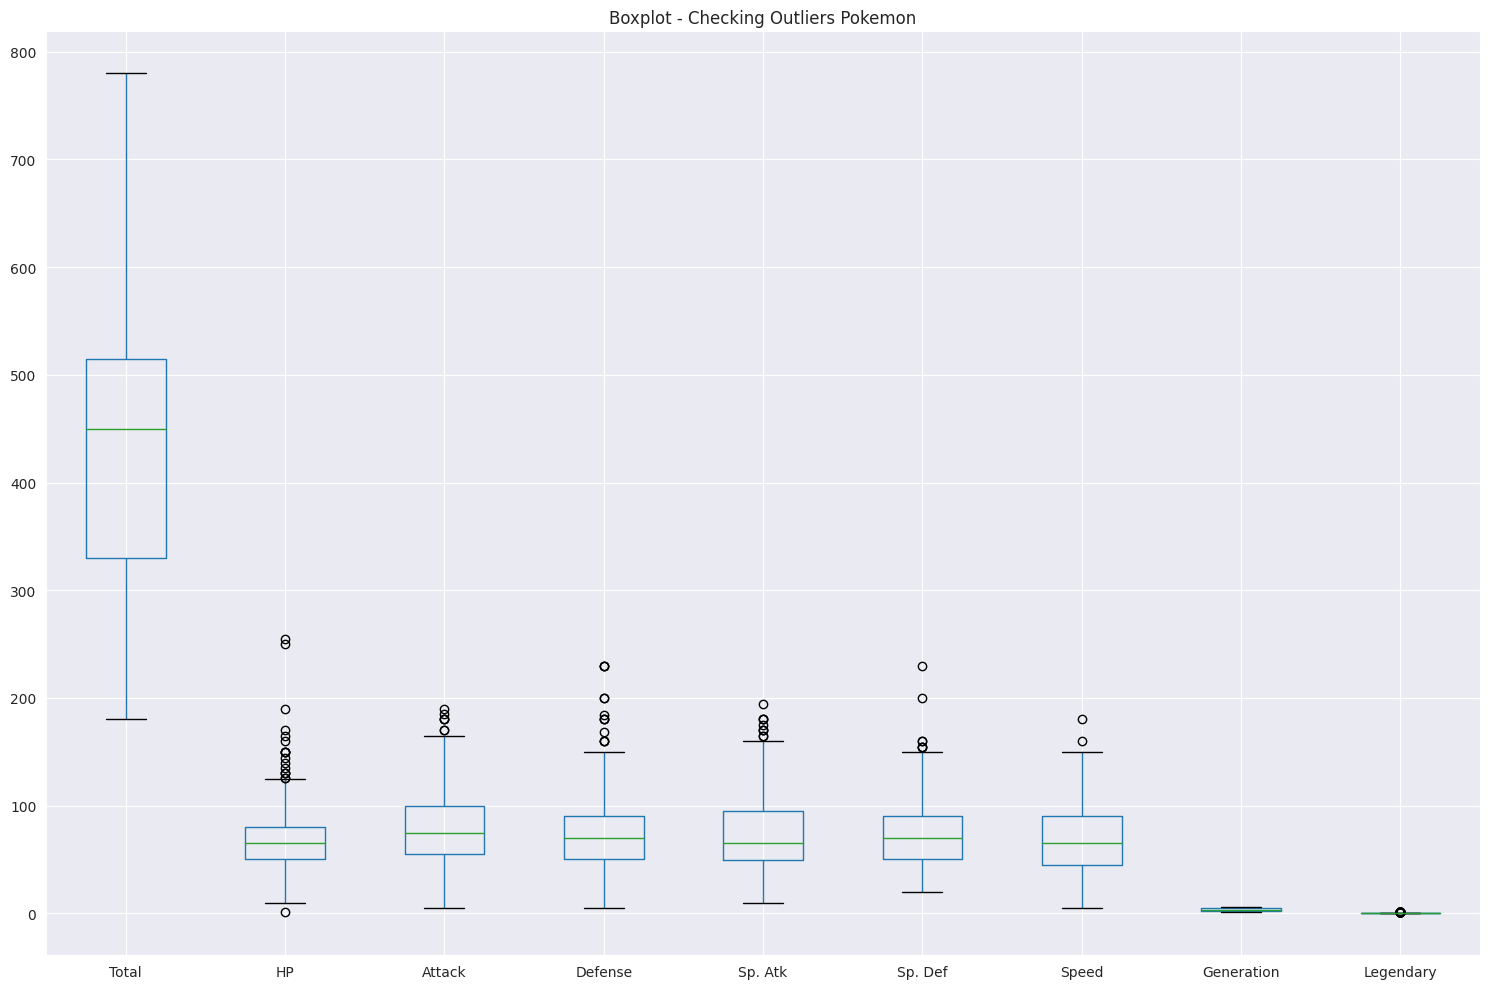

In [9]:
# Checking Outliers with Boxplot Visualization
plt.figure(figsize=(15, 10))
pokemon.boxplot(column=['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'])
plt.title('Boxplot - Checking Outliers Pokemon')
plt.tight_layout()
plt.show()

In [10]:
#Showing Data Statistic
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Generation 1: 166 Pokemon
Generation 5: 165 Pokemon
Generation 3: 160 Pokemon
Generation 4: 121 Pokemon
Generation 2: 106 Pokemon
Generation 6: 82 Pokemon


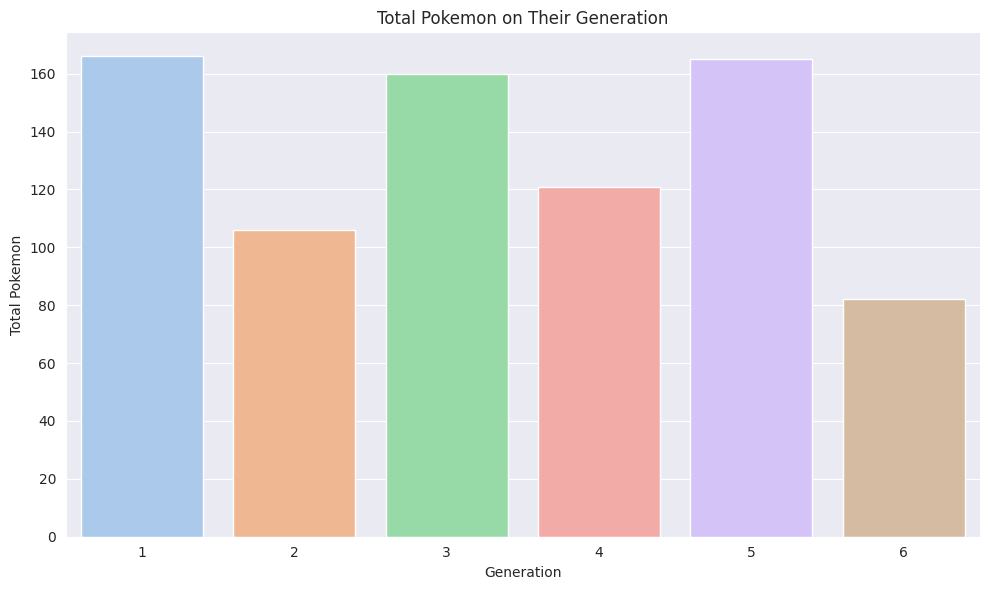

In [11]:
# Counting Pokemon in Each Generation
pokemon_each_generation = pokemon['Generation'].value_counts().sort_values(ascending=False)

# Showing Description of Count Pokemon In Each Generation
for generation, count in pokemon_each_generation.items():
    print(f"Generation {generation}: {count} Pokemon")

# Create Plots Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=pokemon_each_generation.index, y=pokemon_each_generation.values, palette='pastel')
plt.title('Total Pokemon on Their Generation')
plt.xlabel('Generation')
plt.ylabel('Total Pokemon')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Water: 112 Pokemon
Normal: 98 Pokemon
Grass: 70 Pokemon
Bug: 69 Pokemon
Psychic: 57 Pokemon
Fire: 52 Pokemon
Electric: 44 Pokemon
Rock: 44 Pokemon
Ghost: 32 Pokemon
Ground: 32 Pokemon
Dragon: 32 Pokemon
Dark: 31 Pokemon
Poison: 28 Pokemon
Steel: 27 Pokemon
Fighting: 27 Pokemon
Ice: 24 Pokemon
Fairy: 17 Pokemon
Flying: 4 Pokemon


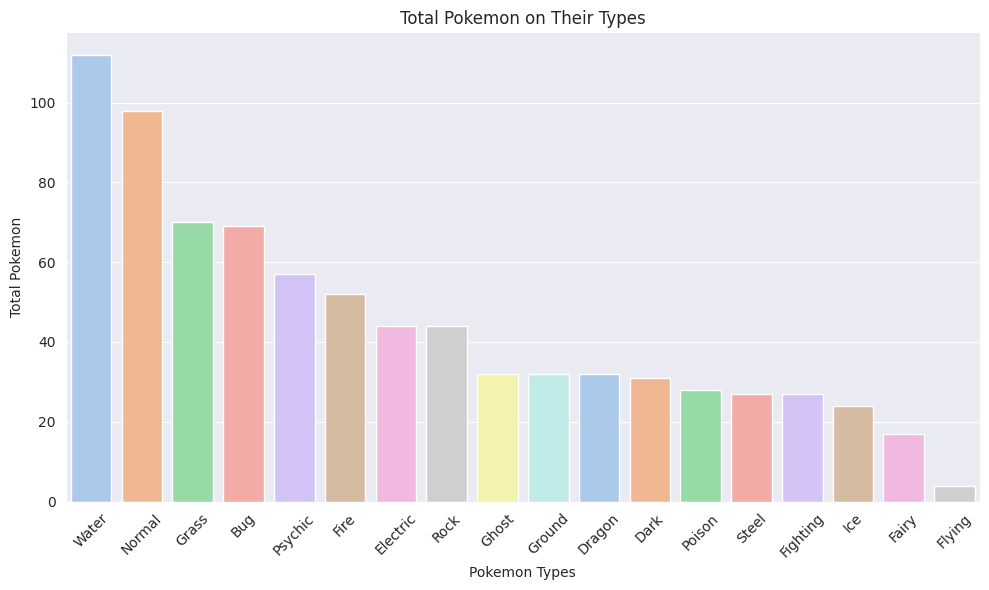

In [12]:
# Counting Pokemon one by one in each Category in column Type 1
pokemon_by_type1 = pokemon['Type 1'].value_counts().sort_values(ascending=False)

# Showing Description of Count Pokemon one by one in each Category in column Type 1
for type1, count in pokemon_by_type1.items():
    print(f"{type1}: {count} Pokemon")

# Create Plots Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=pokemon_by_type1.index, y=pokemon_by_type1.values, palette='pastel')
plt.title('Total Pokemon on Their Types')
plt.xlabel('Pokemon Types')
plt.ylabel('Total Pokemon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Flying: 97 Pokemon
Ground: 35 Pokemon
Poison: 34 Pokemon
Psychic: 33 Pokemon
Fighting: 26 Pokemon
Grass: 25 Pokemon
Fairy: 23 Pokemon
Steel: 22 Pokemon
Dark: 20 Pokemon
Dragon: 18 Pokemon
Water: 14 Pokemon
Ghost: 14 Pokemon
Ice: 14 Pokemon
Rock: 14 Pokemon
Fire: 12 Pokemon
Electric: 6 Pokemon
Normal: 4 Pokemon
Bug: 3 Pokemon


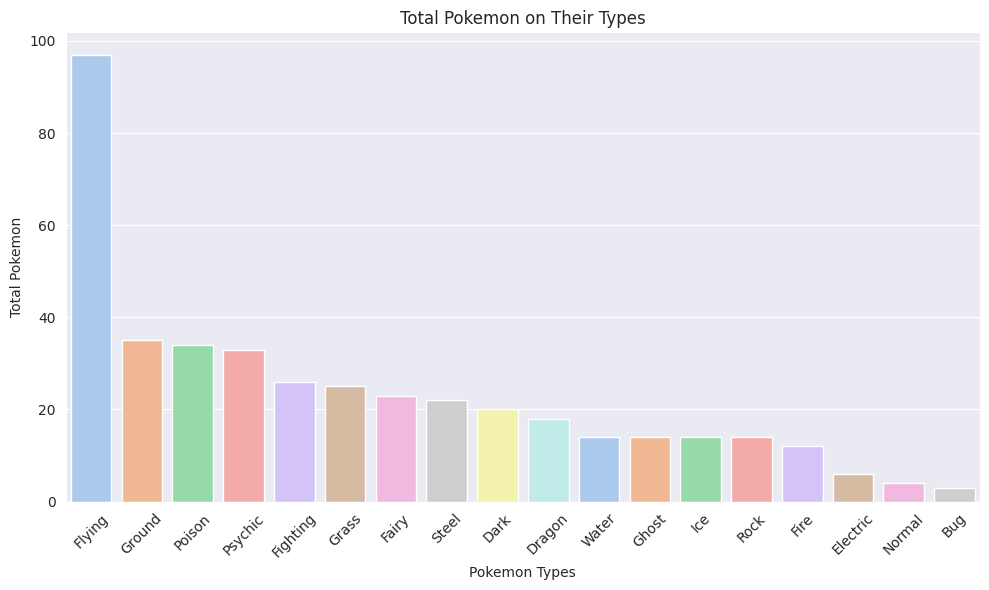

In [13]:
# Counting Pokemon one by one in each Category in column Type 2
pokemon_by_type2 = pokemon['Type 2'].value_counts().sort_values(ascending=False)

# Showing Description of Count Pokemon one by one in each Category in column Type 1
for type2, count in pokemon_by_type2.items():
    print(f"{type2}: {count} Pokemon")

# Create Plots Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=pokemon_by_type2.index, y=pokemon_by_type2.values, palette='pastel')
plt.title('Total Pokemon on Their Types')
plt.xlabel('Pokemon Types')
plt.ylabel('Total Pokemon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

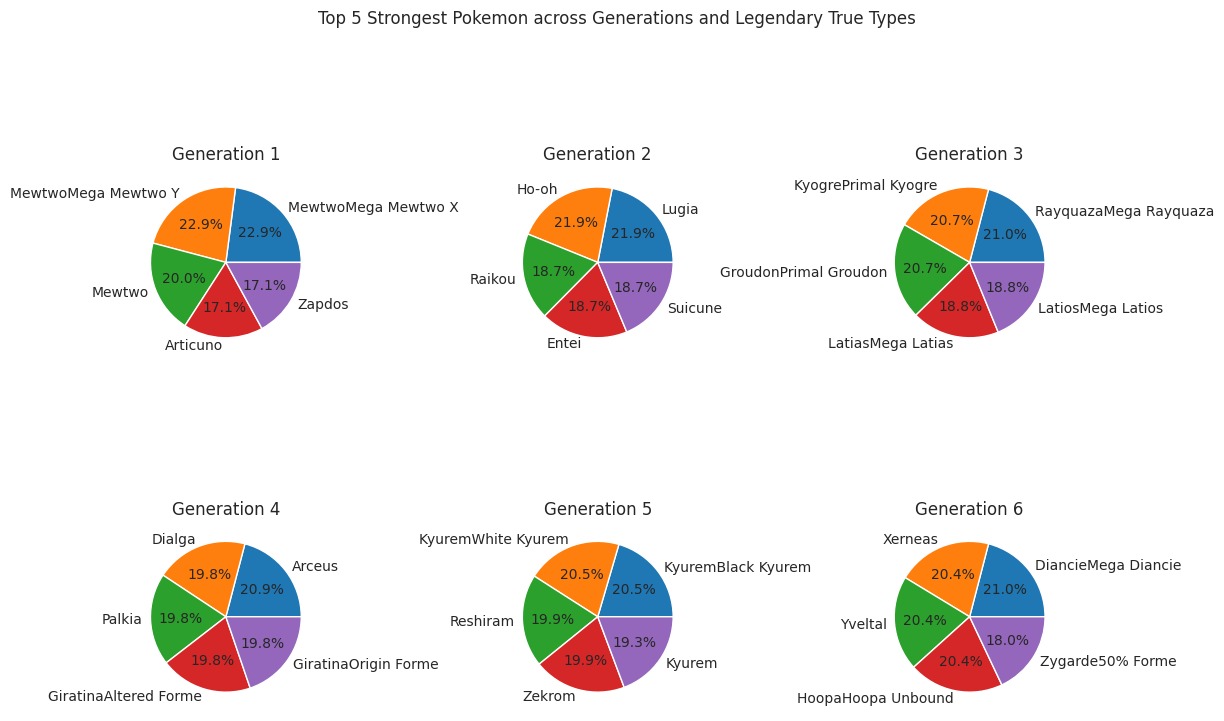

In [14]:
# Filtering Pokemon based on their Generation and Legendary True Type
filtered_pokemon = pokemon[(pokemon['Generation'].isin([1, 2, 3, 4, 5, 6])) & (pokemon['Legendary'].isin([True]))]

# Showing the top 5 Strongest Pokemon across generations and Legendary True types
top_5_across_group = filtered_pokemon.groupby(['Generation', 'Legendary']).apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)

# Set the numbering for each top 5 strongest Pokemon in each generation
top_5_across_group['Rank'] = top_5_across_group.groupby('Generation').cumcount() + 1

# Splitting top 5 data between generations
generations = top_5_across_group['Generation'].unique()
top_5_stats = []

for gen in generations:
    top_5_stats.append(top_5_across_group[top_5_across_group['Generation'] == gen]['Total'].tolist())

# Create pie chart For Each Generation
plt.figure(figsize=(12, 8))

for i, gen in enumerate(generations, start=1):
    plt.subplot(2, 3, i)
    plt.pie(x=top_5_stats[i-1], labels=top_5_across_group[top_5_across_group['Generation'] == gen]['Name'], autopct='%1.1f%%')
    plt.title(f'Generation {gen}')

plt.suptitle('Top 5 Strongest Pokemon across Generations and Legendary True Types')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Set Wider Layout
plt.show()

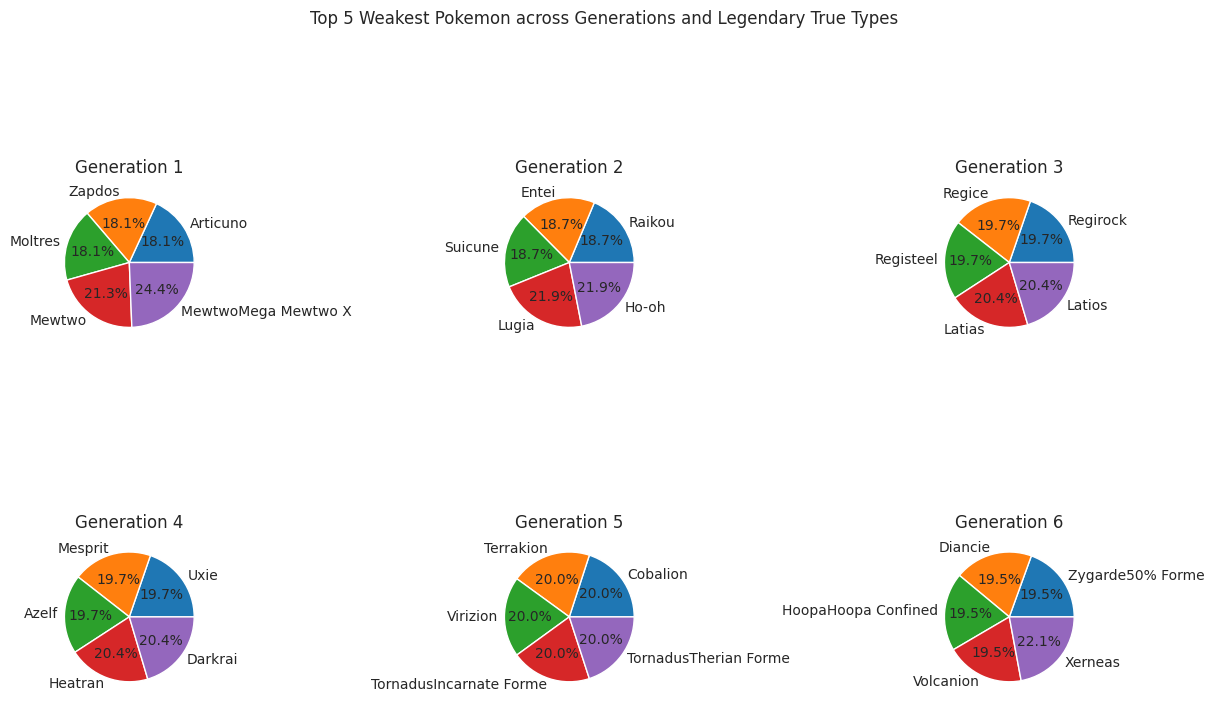

In [15]:
# Filtering Pokemon based on their Generation and Legendary True Type
filtered_pokemon = pokemon[(pokemon['Generation'].isin([1, 2, 3, 4, 5, 6])) & (pokemon['Legendary'].isin([True]))]

# Showing the top 5 weakest Pokemon across generations and Legendary True types
top_5_across_group = filtered_pokemon.groupby(['Generation', 'Legendary']).apply(lambda x: x.nsmallest(5, 'Total')).reset_index(drop=True)

# Set the numbering for each top 5 weakest Pokemon in each generation
top_5_across_group['Rank'] = top_5_across_group.groupby('Generation').cumcount() + 1

# Splitting top 5 data between generations
generations = top_5_across_group['Generation'].unique()
top_5_stats = []

for gen in generations:
    top_5_stats.append(top_5_across_group[top_5_across_group['Generation'] == gen]['Total'].tolist())

# Create pie chart For Each Generation
plt.figure(figsize=(12, 8))

for i, gen in enumerate(generations, start=1):
    plt.subplot(2, 3, i)
    plt.pie(x=top_5_stats[i-1], labels=top_5_across_group[top_5_across_group['Generation'] == gen]['Name'], autopct='%1.1f%%')
    plt.title(f'Generation {gen}')

plt.suptitle('Top 5 Weakest Pokemon across Generations and Legendary True Types')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Set Wider Layout
plt.show()

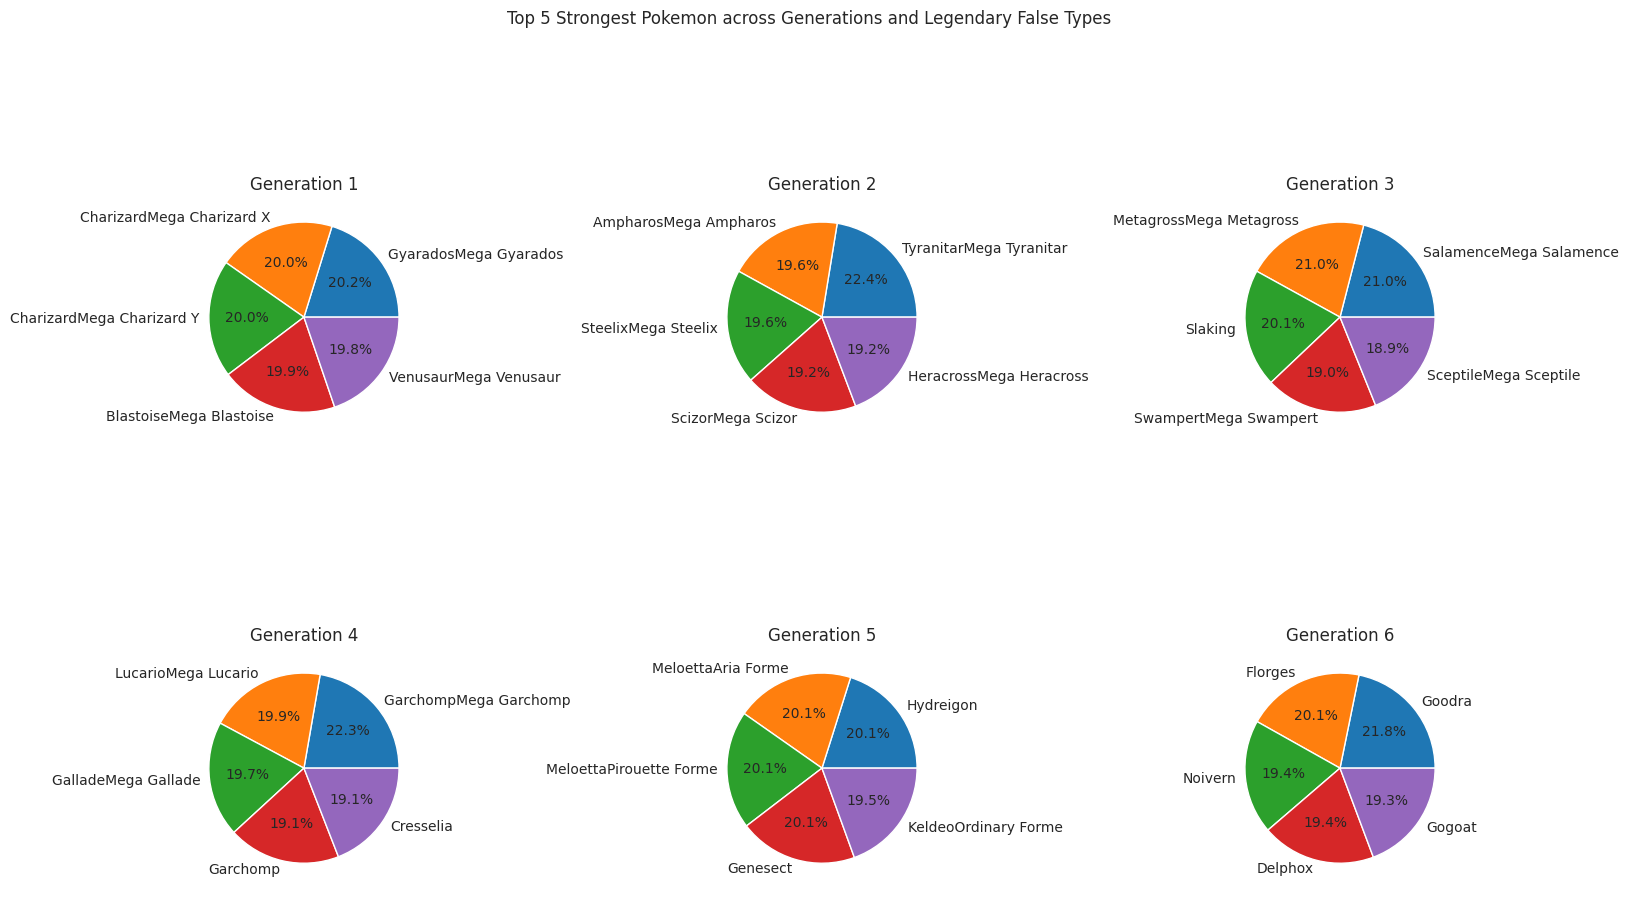

In [16]:
# Filtering Pokemon based on their Generation and Legendary False Type
filtered_pokemon = pokemon[(pokemon['Generation'].isin([1, 2, 3, 4, 5, 6])) & (pokemon['Legendary'].isin([False]))]

# Showing the top 5 strongest Pokemon across generations and Legendary False types
top_5_across_group = filtered_pokemon.groupby(['Generation', 'Legendary']).apply(lambda x: x.nlargest(5, 'Total')).reset_index(drop=True)

# Set the numbering for each top 5 strongest Pokemon in each generation
top_5_across_group['Rank'] = top_5_across_group.groupby('Generation').cumcount() + 1

# Splitting top 5 data between generations
generations = top_5_across_group['Generation'].unique()
top_5_stats = []

for gen in generations:
    top_5_stats.append(top_5_across_group[top_5_across_group['Generation'] == gen]['Total'].tolist())

# Create pie chart For Each Generation
plt.figure(figsize=(16, 10))

for i, gen in enumerate(generations, start=1):
    plt.subplot(2, 3, i)
    plt.pie(x=top_5_stats[i-1], labels=top_5_across_group[top_5_across_group['Generation'] == gen]['Name'], autopct='%1.1f%%')
    plt.title(f'Generation {gen}')

plt.suptitle('Top 5 Strongest Pokemon across Generations and Legendary False Types')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Set Wider Layout
plt.show()

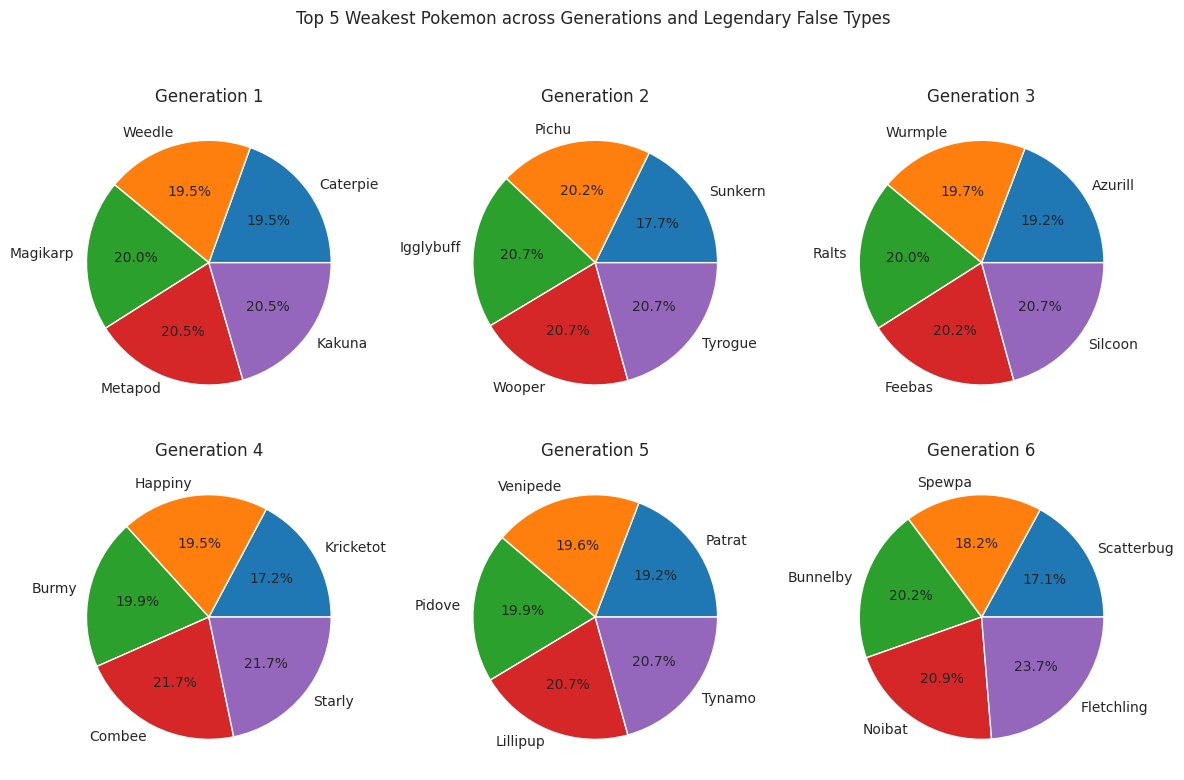

In [17]:
# Filtering Pokemon based on their Generation and Legendary False Type
filtered_pokemon = pokemon[(pokemon['Generation'].isin([1, 2, 3, 4, 5, 6])) & (pokemon['Legendary'].isin([False]))]

# Showing the top 5 weakest Pokemon across generations and Legendary True types
top_5_across_group = filtered_pokemon.groupby(['Generation', 'Legendary']).apply(lambda x: x.nsmallest(5, 'Total')).reset_index(drop=True)

# Set the numbering for each top 5 weakest Pokemon in each generation
top_5_across_group['Rank'] = top_5_across_group.groupby('Generation').cumcount() + 1

# Splitting top 5 data between generations
generations = top_5_across_group['Generation'].unique()
top_5_stats = []

for gen in generations:
    top_5_stats.append(top_5_across_group[top_5_across_group['Generation'] == gen]['Total'].tolist())

# Create pie chart For Each Generation
plt.figure(figsize=(12, 8))

for i, gen in enumerate(generations, start=1):
    plt.subplot(2, 3, i)
    plt.pie(x=top_5_stats[i-1], labels=top_5_across_group[top_5_across_group['Generation'] == gen]['Name'], autopct='%1.1f%%')
    plt.title(f'Generation {gen}')

plt.suptitle('Top 5 Weakest Pokemon across Generations and Legendary False Types')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Set Wider Layout
plt.show()

Strongest Pokemon based on Total:
Name     MewtwoMega Mewtwo X
Total                    780
Name: 163, dtype: object

Weakest Pokemon based on :
Name     Sunkern
Total        180
Name: 206, dtype: object


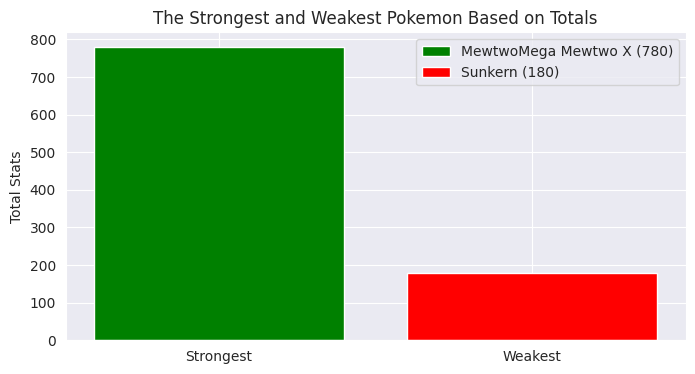

In [18]:
# Find the strongest and weakest Pokemon based on Totals
strongest_pokemon = pokemon.loc[pokemon['Total'].idxmax()]
weakest_pokemon = pokemon.loc[pokemon['Total'].idxmin()]

# Display information about the strongest and weakest Pokemon
print("Strongest Pokemon based on Total:")
print(strongest_pokemon[['Name', 'Total']])
print("\nWeakest Pokemon based on :")
print(weakest_pokemon[['Name', 'Total']])

# Create Visualization
plt.figure(figsize=(8, 4))

# Plots for the strongest Pokemon
plt.bar('Strongest', strongest_pokemon['Total'], color='green', label=f"{strongest_pokemon['Name']} ({strongest_pokemon['Total']})")

# Plots for the weakest Pokemon
plt.bar('Weakest', weakest_pokemon['Total'], color='red', label=f"{weakest_pokemon['Name']} ({weakest_pokemon['Total']})")

plt.title('The Strongest and Weakest Pokemon Based on Totals')
plt.ylabel('Total Stats')
plt.legend()
plt.show()

Strongest Pokemon based on HP:
Name    Blissey
HP          255
Name: 261, dtype: object

Weakest Pokemon based on HP:
Name    Shedinja
HP             1
Name: 316, dtype: object


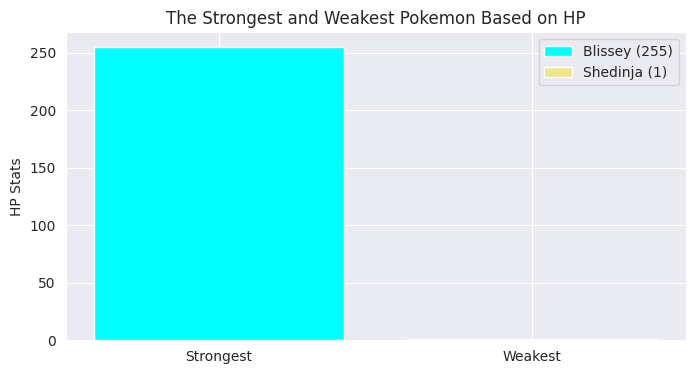

In [19]:
# Find the strongest and weakest Pokemon based on HP
strongest_pokemon = pokemon.loc[pokemon['HP'].idxmax()]
weakest_pokemon = pokemon.loc[pokemon['HP'].idxmin()]

# Display information about the strongest and weakest Pokemon
print("Strongest Pokemon based on HP:")
print(strongest_pokemon[['Name', 'HP']])
print("\nWeakest Pokemon based on HP:")
print(weakest_pokemon[['Name', 'HP']])

# Create Visualization
plt.figure(figsize=(8, 4))

# Plots for the strongest Pokemon
plt.bar('Strongest', strongest_pokemon['HP'], color='aqua', label=f"{strongest_pokemon['Name']} ({strongest_pokemon['HP']})")

# Plots for the weakest Pokemon
plt.bar('Weakest', weakest_pokemon['HP'], color='khaki', label=f"{weakest_pokemon['Name']} ({weakest_pokemon['HP']})")

plt.title('The Strongest and Weakest Pokemon Based on HP')
plt.ylabel('HP Stats')
plt.legend()
plt.show()

Strongest Pokemon based on Attack:
Name      MewtwoMega Mewtwo X
Attack                    190
Name: 163, dtype: object

Weakest Pokemon based on Attack:
Name      Chansey
Attack          5
Name: 121, dtype: object


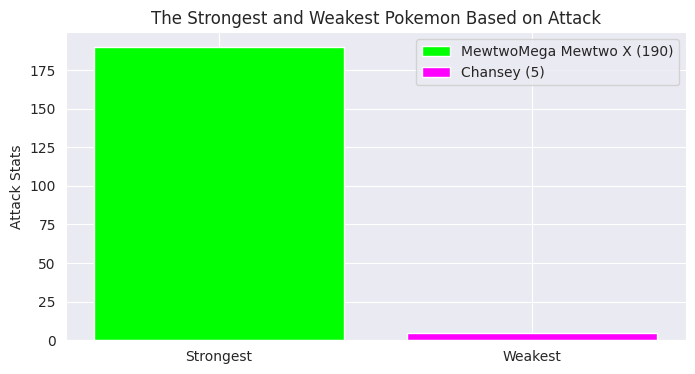

In [20]:
# Find the strongest and weakest Pokemon based on Attack
strongest_pokemon = pokemon.loc[pokemon['Attack'].idxmax()]
weakest_pokemon = pokemon.loc[pokemon['Attack'].idxmin()]

# Display information about the strongest and weakest Pokemon
print("Strongest Pokemon based on Attack:")
print(strongest_pokemon[['Name', 'Attack']])
print("\nWeakest Pokemon based on Attack:")
print(weakest_pokemon[['Name', 'Attack']])

# Create Visualization
plt.figure(figsize=(8, 4))

# Plots for the strongest Pokemon
plt.bar('Strongest', strongest_pokemon['Attack'], color='lime', label=f"{strongest_pokemon['Name']} ({strongest_pokemon['Attack']})")

# Plots for the weakest Pokemon
plt.bar('Weakest', weakest_pokemon['Attack'], color='fuchsia', label=f"{weakest_pokemon['Name']} ({weakest_pokemon['Attack']})")

plt.title('The Strongest and Weakest Pokemon Based on Attack')
plt.ylabel('Attack Stats')
plt.legend()
plt.show()

Strongest Pokemon based on Defense:
Name       SteelixMega Steelix
Defense                    230
Name: 224, dtype: object

Weakest Pokemon based on Defense:
Name       Chansey
Defense          5
Name: 121, dtype: object


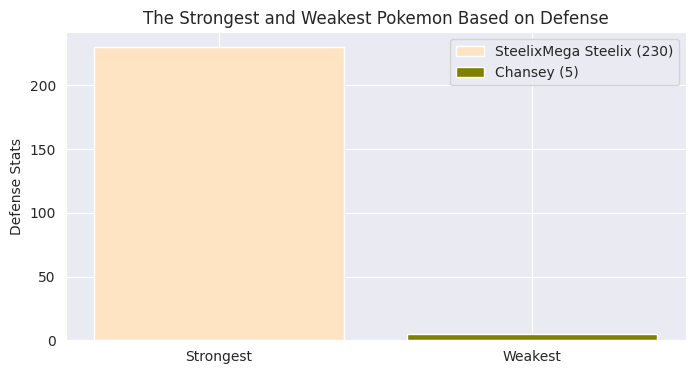

In [21]:
# Find the strongest and weakest Pokemon based on Defense
strongest_pokemon = pokemon.loc[pokemon['Defense'].idxmax()]
weakest_pokemon = pokemon.loc[pokemon['Defense'].idxmin()]

# Display information about the strongest and weakest Pokemon
print("Strongest Pokemon based on Defense:")
print(strongest_pokemon[['Name', 'Defense']])
print("\nWeakest Pokemon based on Defense:")
print(weakest_pokemon[['Name', 'Defense']])

# Create Visualization
plt.figure(figsize=(8, 4))

# Plots for the strongest Pokemon
plt.bar('Strongest', strongest_pokemon['Defense'], color='bisque', label=f"{strongest_pokemon['Name']} ({strongest_pokemon['Defense']})")

# Plots for the weakest Pokemon
plt.bar('Weakest', weakest_pokemon['Defense'], color='olive', label=f"{weakest_pokemon['Name']} ({weakest_pokemon['Defense']})")

plt.title('The Strongest and Weakest Pokemon Based on Defense')
plt.ylabel('Defense Stats')
plt.legend()
plt.show()

Strongest Pokemon based on Speed:
Name     MewtwoMega Mewtwo X
Speed                    130
Name: 163, dtype: object

Weakest Pokemon based on Speed:
Name     Chansey
Speed         50
Name: 121, dtype: object


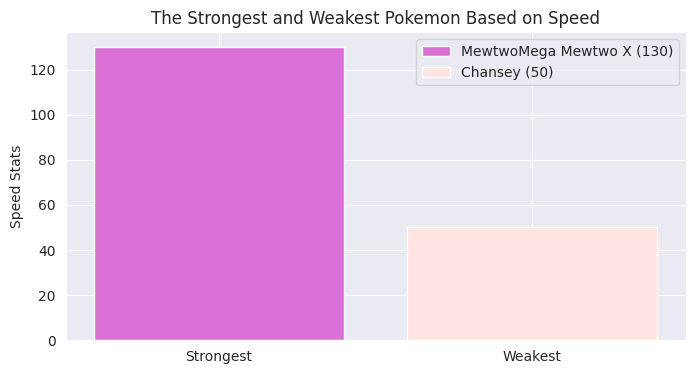

In [23]:
# Find the strongest and weakest Pokemon based on Speed
strongest_pokemon = pokemon.loc[pokemon['Attack'].idxmax()]
weakest_pokemon = pokemon.loc[pokemon['Attack'].idxmin()]

# Display information about the strongest and weakest Pokemon
print("Strongest Pokemon based on Speed:")
print(strongest_pokemon[['Name', 'Speed']])
print("\nWeakest Pokemon based on Speed:")
print(weakest_pokemon[['Name', 'Speed']])

# Create Visualization
plt.figure(figsize=(8, 4))

# Plots for the strongest Pokemon
plt.bar('Strongest', strongest_pokemon['Speed'], color='orchid', label=f"{strongest_pokemon['Name']} ({strongest_pokemon['Speed']})")

# Plots for the weakest Pokemon
plt.bar('Weakest', weakest_pokemon['Speed'], color='mistyrose', label=f"{weakest_pokemon['Name']} ({weakest_pokemon['Speed']})")

plt.title('The Strongest and Weakest Pokemon Based on Speed')
plt.ylabel('Speed Stats')
plt.legend()
plt.show()

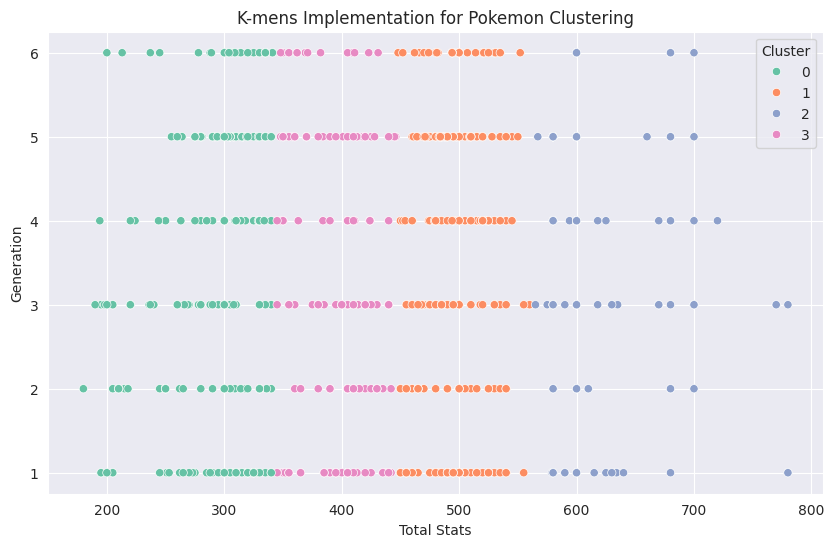

In [24]:
# Prepare the data for clustering
X = pokemon[['Total', 'Generation']]

# Determine the number of clusters
k = 4

# Create the KMeans model
kmeans = KMeans(n_clusters=k)

# Train the model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataframe
pokemon['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pokemon, x='Total', y='Generation', hue='Cluster', palette='Set2', legend='full')
plt.title('K-mens Implementation for Pokemon Clustering')
plt.xlabel('Total Stats')
plt.ylabel('Generation')
plt.show()

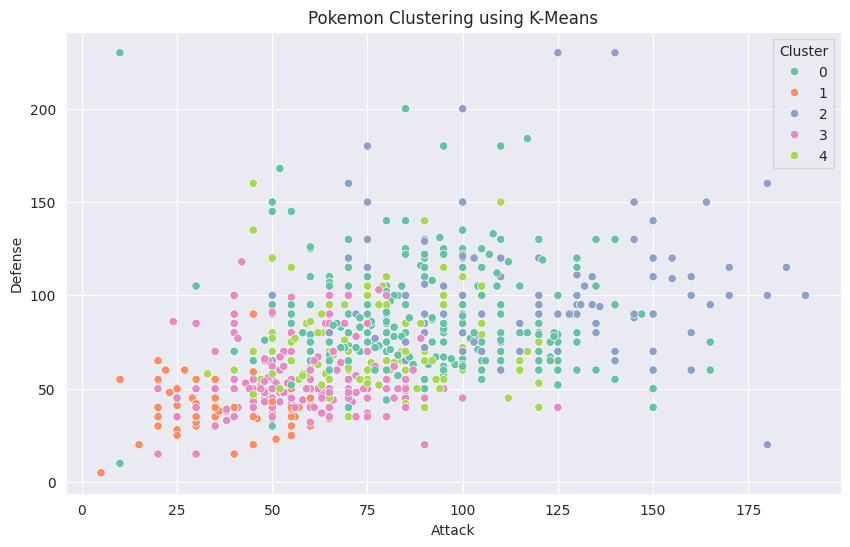

In [25]:
# Prepare the data for clustering
X = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Determine the number of clusters
k = 5

# Create the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Train the model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the dataframe
pokemon['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pokemon, x='Attack', y='Defense', hue='Cluster', palette='Set2', legend='full')
plt.title('Pokemon Clustering using K-Means')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()